# Machine Learning Potential Energy Surface example
See sGDML [documentation](http://www.sgdml.org/#code)

In [1]:
import numpy as np
from sgdml.predict import GDMLPredict
from sgdml.utils import io

In [2]:
model = np.load('ethanol-aims.PBE.TS.light.tier.1-train2000-sym6.npz')
gdml = GDMLPredict(model)

r,_ = io.read_xyz('ethanol.xyz')
e,f = gdml.predict(r)

In [3]:
r


array([[-0.2161   ,  0.383454 ,  0.373037 ,  0.350325 ,  0.8106   ,
        -0.960099 , -0.0932569, -1.07753  ,  0.52357  ,  0.349465 ,
         0.810199 ,  1.39163  , -1.27296  ,  0.679169 ,  0.406791 ,
        -0.298937 ,  1.17559  , -1.78152  ,  1.07352  ,  1.51199  ,
        -0.739556 ,  1.05098  , -0.0143825, -1.32549  , -1.02219  ,
        -1.28851  ,  0.732807 ]])

In [4]:
e


array([-97191.46041679])

In [5]:
f

array([[ 20.97050004,  -6.01890852,  47.41609147,  18.73324658,
        -45.41669271, -14.88330225, -25.84944428,  19.28499601,
         -2.19671618, -27.56934791,  -9.7952442 , -60.83653668,
         -2.62430803,   0.35265037,   9.36149942,  -1.09654287,
         -8.57081708,  13.19251026,  36.09374324,  55.29134824,
          3.96433017, -26.17099472,  11.60620654,   2.17812029,
          7.51314796, -16.73353864,   1.80400349]])

## Now use Atomic Simulation Environment

In [7]:
!pip install sgdml[ase]

  Using cached ase-3.22.1-py3-none-any.whl (2.2 MB)


In [13]:
from sgdml.intf.ase_calc import SGDMLCalculator

from ase.io import read
from ase.optimize import QuasiNewton
from ase.md.velocitydistribution import (MaxwellBoltzmannDistribution, Stationary, ZeroRotation)
from ase.md.verlet import VelocityVerlet
from ase import units
from IPython.display import HTML
from  ase.build import  molecule

### Function to create html to display molecule

In [10]:
def atoms_to_html(atoms):
    'Return the html representation the atoms object as string'

    from tempfile import NamedTemporaryFile

    with NamedTemporaryFile('r+', suffix='.html') as ntf:
        atoms.write(ntf.name, format='html')
        ntf.seek(0)
        html = ntf.read()
    return html

In [9]:
model_path = 'ethanol-aims.PBE.TS.light.tier.1-train2000-sym6.npz'
calc = SGDMLCalculator(model_path)

mol = read('ethanol.xyz')
mol.set_calculator(calc)

[WARN] Please remember to specify the proper conversion factors, if your model does not use
       'kcal/mol' and 'Ang' as units.


In [14]:
ethanol_html = atoms_to_html(mol)
HTML(ethanol_html)

In [15]:
# do a quick geometry relaxation
qn = QuasiNewton(mol)
qn.run(1e-4, 100)

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:53:13    -4214.620588        2.9274
BFGSLineSearch:    1[  2] 15:53:13    -4214.953783        2.1493
BFGSLineSearch:    2[  4] 15:53:13    -4215.128777        1.7421
BFGSLineSearch:    3[  6] 15:53:13    -4215.219415        1.0028
BFGSLineSearch:    4[  8] 15:53:14    -4215.238322        0.4287
BFGSLineSearch:    5[ 10] 15:53:14    -4215.244619        0.1813
BFGSLineSearch:    6[ 12] 15:53:14    -4215.250176        0.2167
BFGSLineSearch:    7[ 14] 15:53:14    -4215.252263        0.1689
BFGSLineSearch:    8[ 16] 15:53:14    -4215.255055        0.1463
BFGSLineSearch:    9[ 17] 15:53:15    -4215.260489        0.3077
BFGSLineSearch:   10[ 19] 15:53:15    -4215.269531        0.4122
BFGSLineSearch:   11[ 21] 15:53:15    -4215.276201        0.7329
BFGSLineSearch:   12[ 23] 15:53:15    -4215.287996        1.1343
BFGSLineSearch:   13[ 24] 15:53:15    -4215.322056        0.4095
BFGSLineSearch:   14[ 25]

True

### Now display optimized structure

In [17]:
ethanol_html = atoms_to_html(mol)
HTML(ethanol_html)

In [19]:
mol.get_chemical_symbols()

['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']

In [18]:
mol.get_all_distances()

array([[0.        , 1.51758654, 1.43655856, 1.10664295, 1.10664365,
        2.16480047, 2.16246177, 2.16480273, 1.96883971],
       [1.51758654, 0.        , 2.39062623, 2.1631522 , 2.16315127,
        1.09913592, 1.09940735, 1.0991372 , 3.23670925],
       [1.43655856, 2.39062623, 0.        , 2.09905161, 2.09905037,
        2.65249693, 3.35323651, 2.65251162, 0.97146705],
       [1.10664295, 2.1631522 , 2.09905161, 0.        , 1.78578483,
        3.0813799 , 2.49928632, 2.51278501, 2.34173798],
       [1.10664365, 2.16315127, 2.09905037, 1.78578483, 0.        ,
        2.51279006, 2.49927861, 3.08138143, 2.34175433],
       [2.16480047, 1.09913592, 2.65249693, 3.0813799 , 2.51279006,
        0.        , 1.78340016, 1.78118077, 3.5421863 ],
       [2.16246177, 1.09940735, 3.35323651, 2.49928632, 2.49927861,
        1.78340016, 0.        , 1.78339751, 4.09330705],
       [2.16480273, 1.0991372 , 2.65251162, 2.51278501, 3.08138143,
        1.78118077, 1.78339751, 0.        , 3.54218693],


In [21]:
mol.get_distance(2,8) # O-H distance

0.9714670510363133

In [22]:
mol.get_potential_energy()

array([-4215.40185838])

In [23]:
mol.set_distance(2,8,1.1) # O-H distance

In [24]:
mol.get_potential_energy()

array([-4215.08854418])

In [54]:
en = []
dist = []
for r in np.arange(0.8,1.3,0.01):
    mol.set_distance(2,8,r) # O-H distance
    dist.append(mol.get_distance(2,8))
    en.append(mol.get_potential_energy())

In [55]:
en = en - min(en) # Remove minimum energy offset

In [56]:
import numpy as np
en = np.array(en).T.reshape(50) # Transpose
dist = np.array(dist).T.reshape(50)

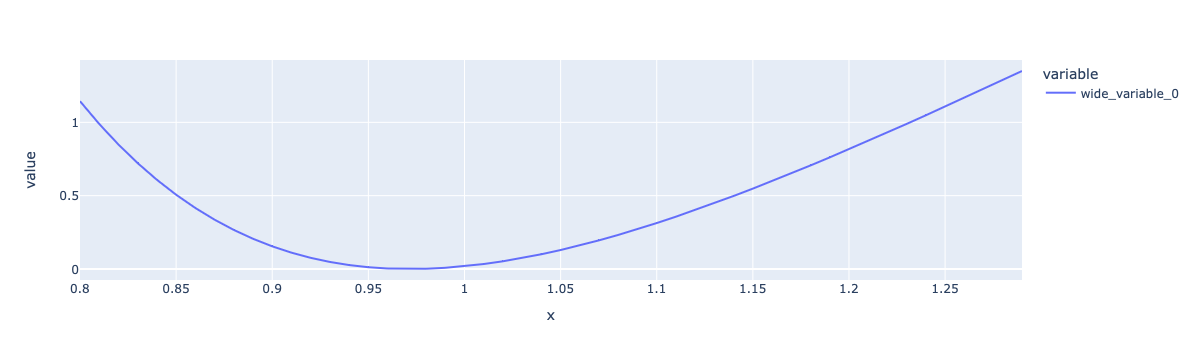

In [57]:
import plotly.express as px

fig = px.line(x=dist, y=[en])

fig.show()